In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [25]:

image_file = Image.open("02.jpeg") # open colour image
image_file = image_file.convert('L') # convert image to black and white
image_file.save('02_black.jpg')


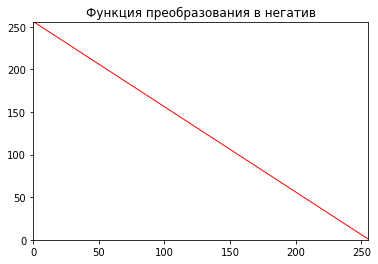

In [26]:

# Load the image

def neg_plot():
    x=np.arange(0,256,0.01)
    y=np.arange(256,0,-0.01)
    plt.plot(x,y,'r',linewidth=1)
    plt.rcParams ['font.sans-serif'] = ['SimHei'] # Отображать китайские теги как обычно
    plt.title (u'Функция преобразования в негатив')
    plt.xlim(0,255),plt.ylim(0,255)
    plt.show()

img = Image.open("02_black.jpg")


# Display the original image

# img.show()

# Read pixels and apply negative transformation

for i in range(0, img.size[0]-1):

    for j in range(0, img.size[1]-1):

        # Get pixel value at (x,y) position of the image

        pixelColorVals = img.getpixel((i,j))

        # Invert color

        Pixel    = 255 - pixelColorVals # Negate red pixel


        # Modify the image with the inverted pixel values

        img.putpixel((i,j),Pixel)

neg_plot()
# Display the negative image

img.save("02_neg.jpg", "JPEG")

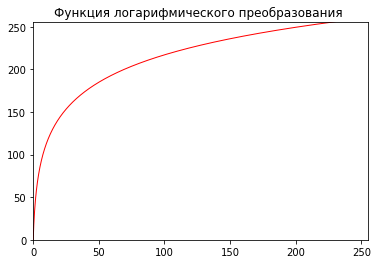

True

In [27]:

 
 # Рисование кривой
def log_plot(c):
    x=np.arange(0,256,0.01)
    y=c*np.log(1+x)
    plt.plot(x,y,'r',linewidth=1)
    plt.rcParams ['font.sans-serif'] = ['SimHei'] # Отображать китайские теги как обычно
    plt.title (u'Функция логарифмического преобразования ')
    plt.xlim(0,255),plt.ylim(0,255)
    plt.show()

 # Логарифмическое преобразование
def log(c,img):
    output=c*np.log(1.0+img)
    output=np.uint8(output+0.5)
    return output

# Прочитать исходное изображение
img=cv2.imread('02_black.jpg')

# Нарисуйте кривую логарифмического преобразования
log_plot(47)
 # Логарифмическое преобразование шкалы серого изображения
output=log(47,img)

# Показать изображение
# cv2.imshow('Input',img)
# cv2.imshow('Output',output)
cv2.imwrite('02_log.jpg', output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


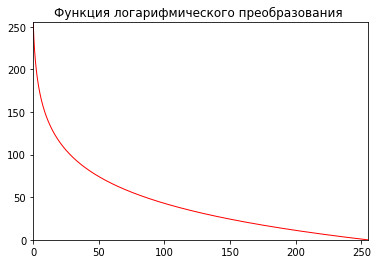

True

In [28]:

 
 # Рисование кривой
def log_plot2(c):
    x=np.arange(0,256,0.01)
    y=255-c*np.log(1+x)
    plt.plot(x,y,'r',linewidth=1)
    plt.rcParams ['font.sans-serif'] = ['SimHei'] # Отображать китайские теги как обычно
    plt.title (u'Функция логарифмического преобразования ')
    plt.xlim(0,255),plt.ylim(0,255)
    plt.show()

 # Логарифмическое преобразование
def log2(c,img):
    output=c*np.log(1.0+img)
    output=np.uint8(output+0.5)
    return output

# Прочитать исходное изображение
img=cv2.imread('02_black.jpg')

# Нарисуйте кривую логарифмического преобразования
log_plot2(46)
 # Логарифмическое преобразование шкалы серого изображения
output=log2(47,img)

# Показать изображение
# cv2.imshow('Input',img)
# cv2.imshow('Output',output)
cv2.imwrite('02_log.jpg', output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

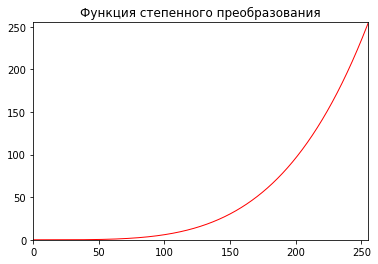

True

In [32]:


# Рисование кривой
def gamma_plot(c, v):
  x = np.arange(0, 256, 0.01)
  y = c*x**v
  plt.plot(x, y, 'r', linewidth=1)
  plt.rcParams ['font.sans-serif'] = ['SimHei'] # Отображать китайские теги как обычно
  plt.title (u'Функция степенного преобразования')
  plt.xlim([0, 255]), plt.ylim([0, 255])
  plt.show()

 # Гамма преобразование
def gamma(img, c, v):
  lut = np.zeros(256, dtype=np.float32)
  for i in range(256):
    lut[i] = c * i ** v
  output_img = cv2.LUT (img, lut) # Отображение значения серого пикселя
  output_img = np.uint8(output_img+0.5)  
  return output_img

# Прочитать исходное изображение
img = cv2.imread('01_black.jpg')

  # Нарисуйте кривую гамма-преобразования
gamma_plot(0.00000006, 4.0)

  # Гамма-преобразование оттенков серого изображения
output = gamma(img, 1.1, 1.1)

# Показать изображение
# cv2.imshow('Input', img)
# cv2.imshow('Output', output)
cv2.imwrite('01_deg_2.jpg', output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [30]:
import cv2
import numpy as np

# Функция для отображения каждого уровня интенсивности на выходной уровень интенсивности.

def pixelVal(pix, r1, s1, r2, s2):

    if (0 <= pix and pix <= r1):

        return (s1 / r1)*pix

    elif (r1 < pix and pix <= r2):

        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1

    else:

        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

# Откройте изображение.

img = cv2.imread('02_black.jpg')

# Определить параметры.

r1 = 70

s1 = 0

r2 = 140

s2 = 255

# Векторизовать функцию, чтобы применить ее к каждому значению в массиве Numpy.

pixelVal_vec = np.vectorize(pixelVal)

  
# Применить контрастное растяжение.

contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)

  
# Сохранить отредактированное изображение.

cv2.imwrite('02_sl.jpg', contrast_stretched)

True

In [31]:
from PIL import Image
 
def crop_center(pil_img, crop_width: int, crop_height: int) -> Image:
    """
    Функция для обрезки изображения по центру.
    """
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))
 
im = Image.open('02_black.jpg')
im_new = crop_center(im, 400, 400)
im_new.save('guido_crop_center_2.jpg', quality=95)